In [1]:
import datetime

print(f"Last updated: {datetime.datetime.now()}")


Last updated: 2025-03-07 15:37:35.884957


In [2]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt



import sklearn

print(f"Using Scikit-Learn version: {sklearn.__version__} (materials in this notebook require this version or newer).")

from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris

Using Scikit-Learn version: 1.6.1 (materials in this notebook require this version or newer).


In [3]:
def train_validate_test_split(data, labels, testRatio=0.3, valRatio=0.3, RS=0):



    total_samples = data.shape[0]



    indices = np.arange(total_samples)

    np.random.seed(RS)

    np.random.shuffle(indices)

    data = data.iloc[indices]

    labels = labels.iloc[indices]



    # Split sizes

    test_size = int(total_samples * testRatio)

    val_size = int(total_samples * valRatio)



    test_data = data[:test_size]

    test_labels = labels[:test_size]



    val_data = data[test_size:test_size + val_size]

    val_labels = labels[test_size:test_size + val_size]



    train_data = data[test_size + val_size:]

    train_labels = labels[test_size + val_size:]



    return train_data, train_labels, val_data, val_labels, test_data, test_labels


In [4]:
def CalcAcc(YPred, YTest):
    TP = 0
    for pred, actual in zip(YPred, YTest):
        if pred == actual:
            TP += 1
    Accuracy = TP / len(YPred)
    Accuracy=Accuracy*100
    print (Accuracy,"%")

In [6]:
import pandas as pd

iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# Create X (all the feature columns)
X = iris.drop("species", axis=1)
# Create y (the target column)
y = iris["species"]
# Check the head of the features DataFrame
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Check the head and the value counts of the labels
y.head(), y.value_counts()

(0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: species, dtype: object,
 species
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: count, dtype: int64)

In [10]:
# Split the data into training and test sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25) # by default train_test_split uses 25% of the data for the test set
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [11]:
X_train, y_train,X_val,y_val, X_test, y_test =train_validate_test_split(X,y,testRatio=0.2,RS=15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 4), (30, 4), (75,), (30,))

In [12]:
# Since we're working on a classification problem, we'll start with a GaussianNBClassifier
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

In [13]:
# View the current hyperparameters

clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [14]:
GNB_Params = {
    "var_smoothing": [1e-9, 1e-8, 1e-7],
    "priors": [(0.34, 0.33, 0.33),
        (0.25, 0.5, 0.25),]}
GRS=GridSearchCV(clf,GNB_Params)
GRS.fit(X_train,y_train)
print(GRS.best_params_,"\n")
print(GRS.best_score_)

{'priors': (0.25, 0.5, 0.25), 'var_smoothing': 1e-09} 

0.9466666666666667


In [15]:
clf = GaussianNB(priors=[0.34, 0.33, 0.33],var_smoothing=1e-09)
clf.fit(X=X_train, y=y_train)

GaussianNB(priors=[0.34, 0.33, 0.33])

In [16]:
# In order to predict a label, data has to be in the same shape as X_train
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
61,5.9,3.0,4.2,1.5
90,5.5,2.6,4.4,1.2
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4


In [17]:
from sklearn.model_selection import cross_val_score

# With cross-validation
model = GaussianNB().fit(X_train, y_train)
# Measure the model score on a single train/test split
model_score = model.score(X_test, y_test)
print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")
# Measure the mean cross-validation score across 5 different train and test splits
cross_val_mean = np.mean(cross_val_score(model, X, y, cv=5))
print(f"5-fold cross-validation score: {cross_val_mean * 100:.2f}%")
print("")

Model accuracy on single test set split: 100.00%
5-fold cross-validation score: 95.33%



In [18]:
# Use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X=X_test)

In [19]:
# Evaluate the model on the training set

train_acc = clf.score(X=X_train, y=y_train)
print(f"The model's accuracy on the training dataset is: {train_acc*100}%")

The model's accuracy on the training dataset is: 94.66666666666667%


In [20]:
CalcAcc(y_preds, y_test)

100.0 %


In [21]:
# Evaluate the model on the test set

test_acc = clf.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")

The model's accuracy on the testing dataset is: 100.00%


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Create a classification report
print(classification_report(y_test, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [23]:
# Create a confusion matrix

conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  9]])

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


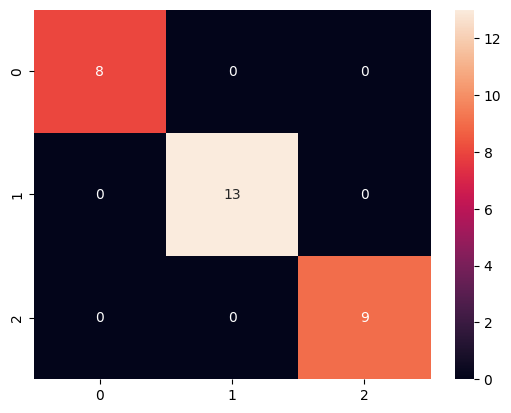

In [24]:
CM_CLF=confusion_matrix(y_test,y_preds)

print(CM_CLF)

sns.heatmap(CM_CLF,annot=True)

plt.show()

In [25]:
# Compute the accuracy score (same as the score() method for classifiers)
accuracy_score(y_test, y_preds)

1.0

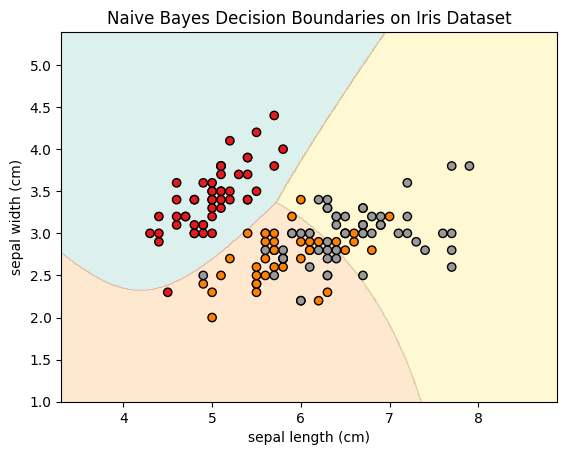

In [26]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
clf = GaussianNB(priors=[0.34, 0.33, 0.33],var_smoothing=1e-09)
model.fit(X, y)

#mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

# Step 3: Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set3)  # Decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)  # Data points
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Naive Bayes Decision Boundaries on Iris Dataset")
plt.show()


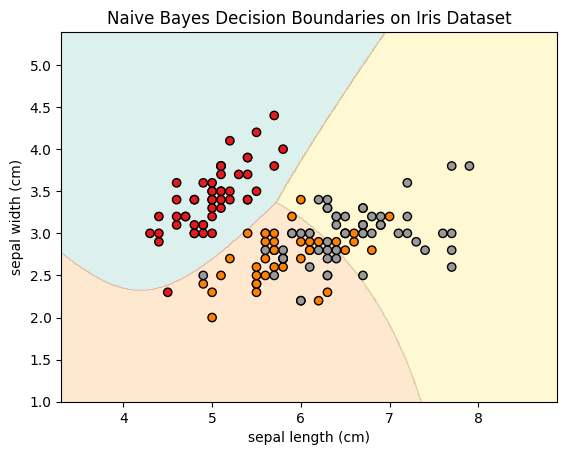

In [28]:
iris = load_iris()
X = iris.data[:, :-2]
y = iris.target
clf = GaussianNB(priors=[0.34, 0.33, 0.33],var_smoothing=1e-09)
model.fit(X, y)

#mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

# Step 3: Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set3)  # Decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)  # Data points
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Naive Bayes Decision Boundaries on Iris Dataset")
plt.show()
